<a href="https://colab.research.google.com/github/ire-mide1/SmartMeter_Energy_Analysis/blob/main/Data_Analysis_OND1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df_ond1 = pd.read_csv('/content/drive/MyDrive/CSV files/ATLAST_OND1.csv')

In [ ]:
df_ond1

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power
0,117606,OND001,2021-01-19T10:56:37,6.76,244.1,50.2,0.99,313.10373,0.000600,1650.116
1,117604,OND001,2021-01-19T10:56:00,6.77,243.6,50.2,0.99,313.08694,0.000600,1649.172
2,117603,OND001,2021-01-19T10:55:23,13.00,242.1,50.2,1.00,313.07016,0.000318,3147.300
3,117602,OND001,2021-01-19T10:54:46,13.79,241.4,50.2,0.99,313.03781,0.000297,3328.906
4,117600,OND001,2021-01-19T10:54:09,13.90,243.0,50.2,0.98,313.00394,0.000290,3377.700
...,...,...,...,...,...,...,...,...,...,...
6523,92174,OND001,2020-12-20T19:40:39,0.19,200.9,49.4,0.06,0.00237,0.001572,38.171
6524,92173,OND001,2020-12-20T19:40:01,0.00,201.5,49.4,0.00,0.00235,0.000000,0.000
6525,92172,OND001,2020-12-20T19:39:24,0.05,201.4,49.3,0.03,0.00235,0.002979,10.070
6526,92171,OND001,2020-12-20T19:38:11,0.00,201.2,49.1,0.00,0.00232,0.000000,0.000


In [ ]:
df_ond1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6528 non-null   int64  
 1   meter_id        6528 non-null   object 
 2   timestamp       6528 non-null   object 
 3   current         6528 non-null   float64
 4   voltage         6528 non-null   float64
 5   frequency       6528 non-null   float64
 6   power_factor    6528 non-null   float64
 7   energy          6528 non-null   float64
 8   real_power      6528 non-null   float64
 9   apparent_power  6528 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 510.1+ KB


In [ ]:
df_ond1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6528.0,1.057050e+05,6155.658721,92170.000,100978.250000,105537.000000,110273.250000,1.176060e+05
current,6528.0,5.361918e+00,11.054620,0.000,0.520000,0.550000,4.267500,7.034000e+01
voltage,6528.0,2.194265e+02,19.351975,0.000,213.000000,222.300000,231.200000,2.595000e+02
frequency,6528.0,5.000697e+01,1.440761,0.000,50.000000,50.100000,50.200000,5.100000e+01
power_factor,6528.0,6.162806e-01,0.195151,0.000,0.520000,0.540000,0.580000,1.000000e+00
energy,6528.0,8.255638e+01,80.415924,0.001,4.874447,70.059775,131.578190,3.131037e+02
real_power,6528.0,inf,NaN,0.000,0.000834,0.004186,0.004608,inf
apparent_power,6528.0,1.092877e+03,2213.208442,0.000,118.524750,124.888000,815.769000,1.536226e+04


In [ ]:
df_ond1.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power
0,117606,OND001,2021-01-19T10:56:37,6.76,244.1,50.2,0.99,313.10373,0.000600,1650.116
1,117604,OND001,2021-01-19T10:56:00,6.77,243.6,50.2,0.99,313.08694,0.000600,1649.172
2,117603,OND001,2021-01-19T10:55:23,13.00,242.1,50.2,1.00,313.07016,0.000318,3147.300
3,117602,OND001,2021-01-19T10:54:46,13.79,241.4,50.2,0.99,313.03781,0.000297,3328.906
4,117600,OND001,2021-01-19T10:54:09,13.90,243.0,50.2,0.98,313.00394,0.000290,3377.700


In [ ]:
df_ond1['timestamp'] = pd.to_datetime(df_ond1['timestamp'],
                                      format = '%Y-%m-%dT%H:%M:%S',
                                      errors = 'coerce')

In [ ]:
df_ond1['year'] = df_ond1['timestamp'].dt.year
df_ond1['month'] = df_ond1['timestamp'].dt.month
df_ond1['week'] = df_ond1['timestamp'].dt.week
df_ond1['day'] = df_ond1['timestamp'].dt.day
df_ond1['hour'] = df_ond1['timestamp'].dt.hour
df_ond1['minute'] = df_ond1['timestamp'].dt.minute
df_ond1['second'] = df_ond1['timestamp'].dt.second
df_ond1['day_of_week'] = df_ond1['timestamp'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_ond1.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week
0,117606,OND001,2021-01-19 10:56:37,6.76,244.1,50.2,0.99,313.10373,0.000600,1650.116,2021,1,3,19,10,56,37,1
1,117604,OND001,2021-01-19 10:56:00,6.77,243.6,50.2,0.99,313.08694,0.000600,1649.172,2021,1,3,19,10,56,0,1
2,117603,OND001,2021-01-19 10:55:23,13.00,242.1,50.2,1.00,313.07016,0.000318,3147.300,2021,1,3,19,10,55,23,1
3,117602,OND001,2021-01-19 10:54:46,13.79,241.4,50.2,0.99,313.03781,0.000297,3328.906,2021,1,3,19,10,54,46,1
4,117600,OND001,2021-01-19 10:54:09,13.90,243.0,50.2,0.98,313.00394,0.000290,3377.700,2021,1,3,19,10,54,9,1


In [ ]:
#to check if there is any missing values in your data.the number of missing values will be shown

pd.isnull(df_ond1).sum()

id                0
meter_id          0
timestamp         0
current           0
voltage           0
frequency         0
power_factor      0
energy            0
real_power        0
apparent_power    0
year              0
month             0
week              0
day               0
hour              0
minute            0
second            0
day_of_week       0
dtype: int64

In [ ]:
#Check if the day of week that was extracted from date is the same data count as the data_ond1 count

D_O_W = df_ond1['day_of_week'].count()
D_C = len(df_ond1)
if D_O_W == D_C:
  print('There is no missing datapoint')
else:
  print("You've got a missing value")

df_ond1['day_of_week'].value_counts()  

There is no missing datapoint


6    1585
3    1358
0    1123
5     975
1     590
4     504
2     393
Name: day_of_week, dtype: int64

In [ ]:
#convert days_of week to categorical attribute
df_ond1['day_of_week']= df_ond1['day_of_week'].map({1: 'Tuesday' , 2: 'Wednesday',
                                                    3:'Thursday', 4: 'Friday', 5: 'Saturday',
                                                    6: 'Sunday', 7: 'Monday'})
df_ond1.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week
0,117606,OND001,2021-01-19 10:56:37,6.76,244.1,50.2,0.99,313.10373,0.000600,1650.116,2021,1,3,19,10,56,37,Tuesday
1,117604,OND001,2021-01-19 10:56:00,6.77,243.6,50.2,0.99,313.08694,0.000600,1649.172,2021,1,3,19,10,56,0,Tuesday
2,117603,OND001,2021-01-19 10:55:23,13.00,242.1,50.2,1.00,313.07016,0.000318,3147.300,2021,1,3,19,10,55,23,Tuesday
3,117602,OND001,2021-01-19 10:54:46,13.79,241.4,50.2,0.99,313.03781,0.000297,3328.906,2021,1,3,19,10,54,46,Tuesday
4,117600,OND001,2021-01-19 10:54:09,13.90,243.0,50.2,0.98,313.00394,0.000290,3377.700,2021,1,3,19,10,54,9,Tuesday


In [ ]:
#day of the week got more datapoint

df_ond1.groupby('day_of_week').size()

day_of_week
Friday        504
Saturday      975
Sunday       1585
Thursday     1358
Tuesday       590
Wednesday     393
dtype: int64

Text(0, 0.5, 'Y axis label')

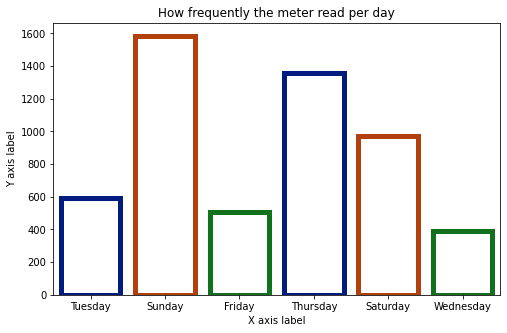

In [ ]:
plt.figure(figsize =(8,5))
sns.countplot(x ='day_of_week', data= df_ond1, orient='h', 
             facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.title('How frequently the meter read per day')
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

In [ ]:
##Sunday is the day when people use most electricity and the meter reads more data

In [ ]:
df_ond1['week'].unique()

array([ 3,  2,  1, 53, 52, 51])

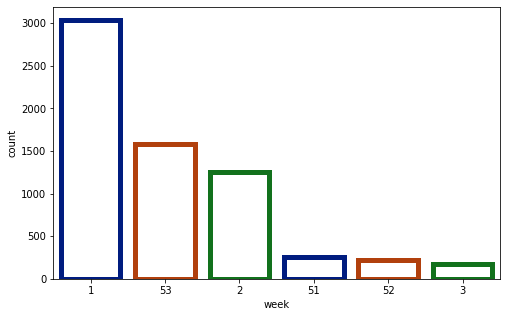

In [ ]:
plt.figure(figsize =(8,5))
sns.countplot(x ='week', data= df_ond1, orient='h', 
              order=df_ond1['week'].value_counts().index,
              facecolor=(0, 0, 0, 0),
              linewidth=5,
              edgecolor=sns.color_palette("dark", 3))

In [ ]:
##The first week of the year has the highest datapoint since it is festive period.

In [ ]:
df_ond1['frequency'].unique()

array([50.2, 50.3, 49.2, 49. , 48.9, 49.4, 49.6, 50. , 49.8, 49.1, 50.5,
       50.1, 49.7, 49.9, 49.3, 49.5, 48.8, 48.7, 50.4, 48.6, 50.6, 50.7,
       48.3, 48.1, 48. , 50.8, 48.5, 48.4, 44.3, 47.8, 44.2, 47.9, 48.2,
       50.9, 51. ,  0. ])

In [ ]:
df_ond1['frequency'].mean()

50.00696997549085

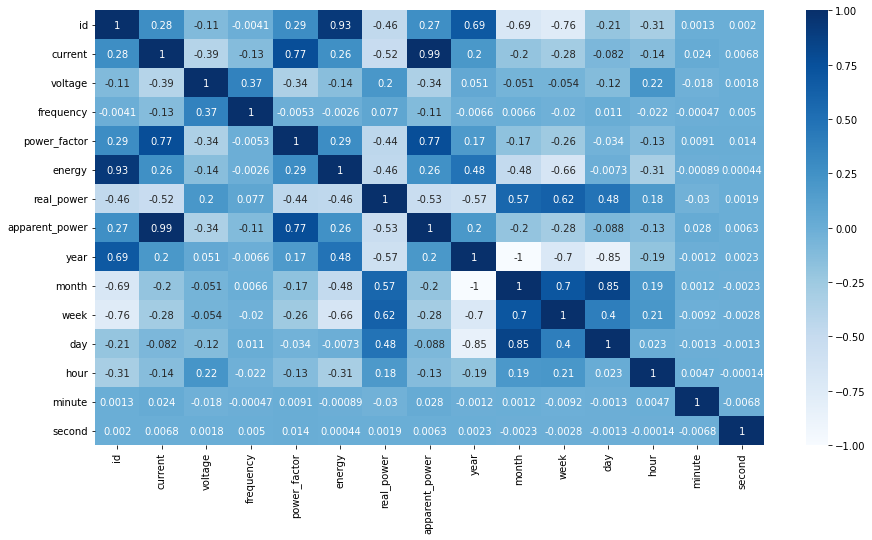

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(df_ond1.corr(), cmap="Blues", annot= True)

## From this visualization, apparent_power highly correlates with current, power_factor.
This means that when current increases both apparent_power and power_factor increase likewise.
However, current doesn't correlate with real_power, frequency and voltage.
In physics, increase in voltage suppose to lead to an increase in current. So there is something wrong here.

In [ ]:
#use groupby and return their exact values..and drop the irrevalant attributes
grouped_df = df_ond1.groupby(['year','month','day',
                              'hour','minute','second'])
grouped_df = grouped_df.first()
grouped_df.drop(labels=['week', 'day_of_week',
                        'timestamp', 'meter_id'],
                axis =1,inplace= True)
grouped_df

id  current  ...  real_power  apparent_power
year month day hour minute second                   ...                            
2020 12    20  19   37     33       92170     0.00  ...    0.000000           0.000
                    38     11       92171     0.00  ...    0.000000           0.000
                    39     24       92172     0.05  ...    0.002979          10.070
                    40     1        92173     0.00  ...    0.000000           0.000
                           39       92174     0.19  ...    0.001572          38.171
...                                   ...      ...  ...         ...             ...
2021 1     19  10   54     9       117600    13.90  ...    0.000290        3377.700
                           46      117602    13.79  ...    0.000297        3328.906
                    55     23      117603    13.00  ...    0.000318        3147.300
                    56     0       117604     6.77  ...    0.000600        1649.172
                           37      117606     6.76  ...    0.000600        1650.116

[6528 rows x 8 columns]

In [ ]:
small_data = grouped_df.head() 

In [ ]:
small_df =grouped_df.sample(frac=0.1)
small_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 653 entries, (2021, 1, 7, 14, 38, 0) to (2021, 1, 6, 23, 39, 3)
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              653 non-null    int64  
 1   current         653 non-null    float64
 2   voltage         653 non-null    float64
 3   frequency       653 non-null    float64
 4   power_factor    653 non-null    float64
 5   energy          653 non-null    float64
 6   real_power      653 non-null    float64
 7   apparent_power  653 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 46.4 KB


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


The maximum apparent_power is  12512.976


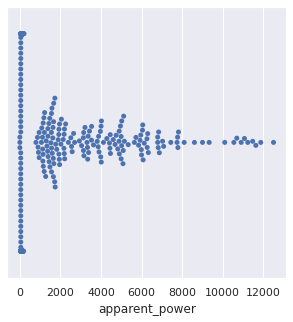

In [ ]:
#there is a data of apparent_power of over 14,000kVA

sns.set(rc= {'figure.figsize': (5,5)})
sns.swarmplot (x= small_df['apparent_power'])
print("The maximum apparent_power is ",small_df['apparent_power'].max())

The apparent power is between 0-14232.
The ones with zero shows that some of the meters didnt read any current or voltage.
As the apparent power =I x V. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


inf


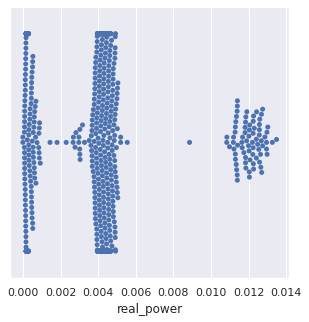

In [ ]:
sns.set(rc= {'figure.figsize': (5,5)})
sns.swarmplot (x= small_df['real_power'])
print(small_df['real_power'].max())

The real power is between 0-0.015.
The ones with zero shows that some of the meters didnt read any current, voltage or power factor.
As the apparent power =IxV... ANd real_power = pF x KVA.

In [ ]:
count_pF = (df_ond1['power_factor'] == 0.00).sum()
count_pF 

38

In [ ]:
count_current = (df_ond1['current'] == 0.00).sum()
count_current

40

In [ ]:
count_voltage = (df_ond1['voltage'] == 0.00).sum()
count_voltage

5

In [ ]:
count_apparent_power = (df_ond1['apparent_power'] == 0.00).sum()
count_apparent_power

40

In [ ]:
count_real_power = (df_ond1['real_power'] == 0.00).sum()
count_real_power

38

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


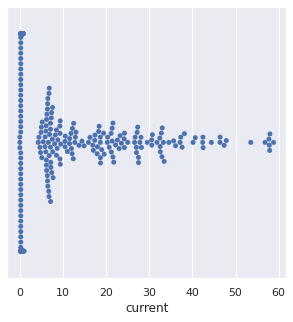

In [ ]:
##current_visualization

sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x= small_df['current'])

Text(0, 0.5, 'Probability Density')

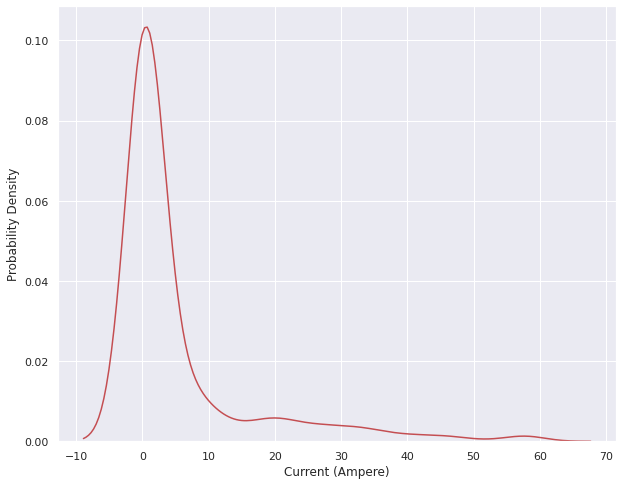

In [ ]:
#This plot explains the current distribution better.

sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(small_df['current'], color='r')
plt.xlabel('Current (Ampere)')
plt.ylabel('Probability Density')

##This plot shows the distribution of current from 0A- 60A.
The current with the highest occurence is around 4A-6A thereabout.
This is a very small current.

Text(0, 0.5, 'Probability Density')

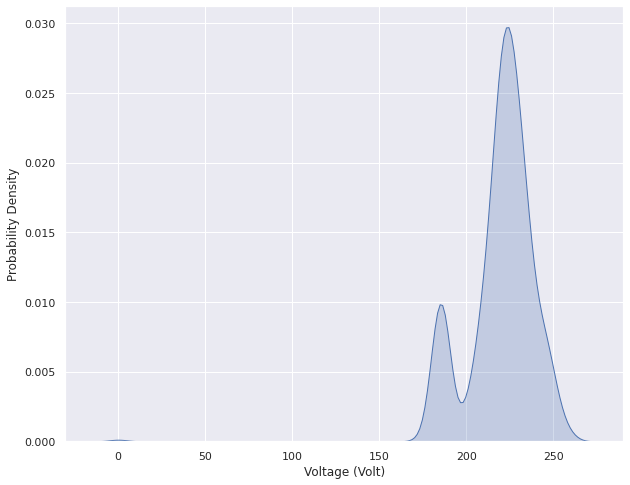

In [ ]:
sns.kdeplot(small_df['voltage'], color='b',
            shade=True, Label='Voltage')
plt.xlabel('Voltage (Volt)')
plt.ylabel('Probability Density')

This doesnt capture the 0V because they are very few in number.
We can however see that most of our voltage data is around 200V-250V.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 651.]),
 array([ 0.  ,  5.08, 10.16, 15.24, 20.32, 25.4 , 30.48, 35.56, 40.64,
        45.72, 50.8 ]),
 <a list of 10 Patch objects>)

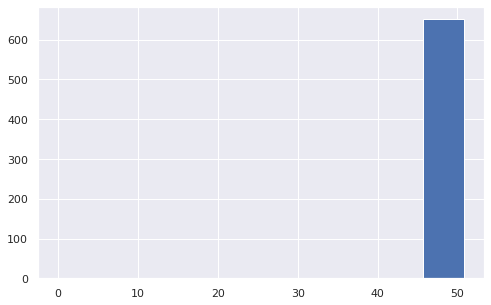

In [ ]:
#plot frequency..from this plot most meters have 50hz

plt.figure(figsize= (8,5))
plt.hist(small_df['frequency'], label= 'Frequency')

In [ ]:
print("The average frequency is ", small_df['frequency'].median() )


The average frequency is  50.1
